## Normalized PDF with Error Function Step

In [1]:
import numpy as np
from sympy import symbols
import math
import cmath 

import matplotlib as mpl
from matplotlib import pyplot as plt 

from scipy.stats import norm
import seaborn as sb 

import lmfit as lf
import scipy.optimize as opt 

from scipy.optimize import curve_fit  

from scipy import special

### PDF Background Transfered from OG Notebook

In [2]:
def normal_distribution(E,N,E1,o): 
    return N*(np.exp(-((E - E1)**2) / (2 * (o**2))))

In [3]:
def error_function(x): 
    return special.erfc(((x-5)/2)*3)

In [4]:
N= 1
E= 10
E1= 10
o= 1 

In [5]:
N2= 1
EE2= 4
E2= 4
o2= 1

In [6]:
#E_range=np.linspace(0,100,101) 
E_range = np.linspace(0, 20, 1000)
#print(E_range)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


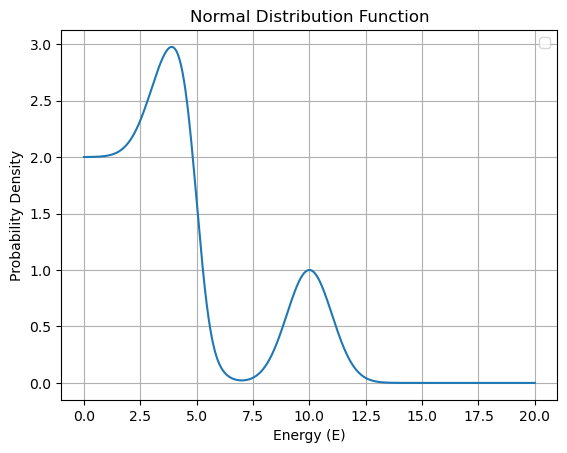

In [7]:
plt.plot(E_range, normal_distribution(E_range,N,E1,o)+normal_distribution(E_range,N2,EE2,o2)+error_function(E_range))
plt.xlabel('Energy (E)')
plt.ylabel('Probability Density')
plt.title('Normal Distribution Function')
plt.legend()
plt.grid(True)
plt.show()

### Integrate Without Normalization?

In [8]:
#from scipy.integrate import quad_vec

In [9]:
#def INT(E_range,N,E1,o,N2,EE2,o2,error_function): 
    #integrals = np.zeros(np.shape(E_range))
    #for i,E in enumerate(E_range): 
        #integrals[i] = quad_vec(normal_distribution,error_function,0,E,args=(N,E1,o,N2,EE2,o2))[0]
    
    #return integrals

In [10]:
#print(INT([20],1,10,1,1,4,1,[20])) 

### Normalized Error Function

In [11]:
from scipy import integrate

In [12]:
integral_value = integrate.quad(error_function, -np.inf, np.inf)

C:\Users\Isikinz\AppData\Local\Temp\ipykernel_41416\1533307733.py:1: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  integral_value = integrate.quad(error_function, -np.inf, np.inf)


In [13]:
def normalized_erf(E_range):
    return error_function(E_range) / integral_value

### Normalized PDF with Step

In [14]:
#defining pi 
print(math.pi) 

#defining e 
print(math.e)

3.141592653589793
2.718281828459045


In [15]:
def normalized(E_range,A,E1,o1,E2,o2): 
    return ((A/math.sqrt(2*math.pi)*o1)*(math.e**(-((E_range-E1)**2)/(2*(o1)**2)))+((1-A)/(math.sqrt(2*math.pi)*o2))*(math.e**(-((E_range-E2)**2)/(2*(o2)**2))))+normalized_erf(E_range)

In [18]:
def Step_normalized(E_range,A,E1,o1,E2,o2): 
    return normalized+normalized_erf

In [19]:
E_range = np.linspace(0, 20, 1000)

A=.7

E1= 10 
o1= 1

E2= 4
o2= 1 


print(Step_normalized(E_range,A,E1,o1,E2,o2))

TypeError: unsupported operand type(s) for +: 'function' and 'function'

### Getting CDF

In [ ]:
from scipy.integrate import quad_vec

In [ ]:
def CDF(E_range,N,E1,o,N2,EE2,o2,error_function): 
    integrals = np.zeros(np.shape(E_range))
    for i,E in enumerate(E_range): 
      integrals[i] = quad_vec(normalized,0,E,args=(N,E1,o,N2,EE2,o2))[0]
    
    return integrals

In [ ]:
print(CDF([5],1,10,1,1,4,1,[5])) 
#Integral from 0 to 5